In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [10]:
map_file = "experiments/maps/map_10.txt"

In [11]:
from src.envs.miniworld.constants import OBJ_MAP, OBSTACLE_MARKER, BLOCK_SCALE
offset = 0.5
def read_miniworld_map(map_file):
    shapes = []
    height = 0
    width = 0
    with open(map_file, 'r') as f:
        map_mat = f.readlines()
    size = len(map_mat)
    print(size)
    for i, l in enumerate(map_mat):
        # I don't consider empty lines!
        l_stripped = l.rstrip()
        if len(l.rstrip()) == 0: continue

        # this is not an empty line!
        height += 1
        for j, e in enumerate(l_stripped):
            if e in OBJ_MAP.keys():
                Entity, color = OBJ_MAP[e]
                if e == OBSTACLE_MARKER:
                    shapes.append(plt.Rectangle((j - offset, size - 1 - i - offset), BLOCK_SCALE, BLOCK_SCALE, fc=color))
                elif Entity.__name__ == "Ball":
                    shapes.append(plt.Circle((j - offset, size - 1 - i - offset), BLOCK_SCALE * 0.6, fc=color))
                elif Entity.__name__ == "Box":
                    shapes.append(plt.Rectangle((j - offset, size - 1 - i - offset), BLOCK_SCALE * 0.6, BLOCK_SCALE * 0.6, fc=color))

        width = max(width, len(l_stripped))
    return shapes, height, width

In [24]:
# df = pd.read_csv("success_map copy.csv")
df = pd.read_csv("results/miniworld_minecraft/sequence_p1.0/lpopl_dsac/map10/6/success_map.csv")

In [25]:
shapes, height, width = read_miniworld_map(map_file)
df['y'] = height - 1 - df['y']

8


In [26]:
df.head()

,task,x,y,success,final_ltl,len,global_step,time
0,"('until', 'True', ('and', 'b', ('until', 'True...",5.752376,1.484230,False,"('until', 'True', 'a')",1000,1001,1.701432e+09
1,"('until', 'True', ('and', 'b', ('until', 'True...",1.196080,5.616529,False,"('until', 'True', ('and', 'b', ('until', 'True...",1000,2002,1.701432e+09
2,"('until', 'True', ('and', 'b', ('until', 'True...",1.263192,2.008899,True,True,751,2754,1.701432e+09
3,"('until', 'True', ('and', 'b', ('until', 'True...",2.691888,1.888553,True,True,619,3374,1.701432e+09
4,"('until', 'True', ('and', 'b', ('until', 'True...",2.893992,4.840180,True,True,173,3548,1.701432e+09


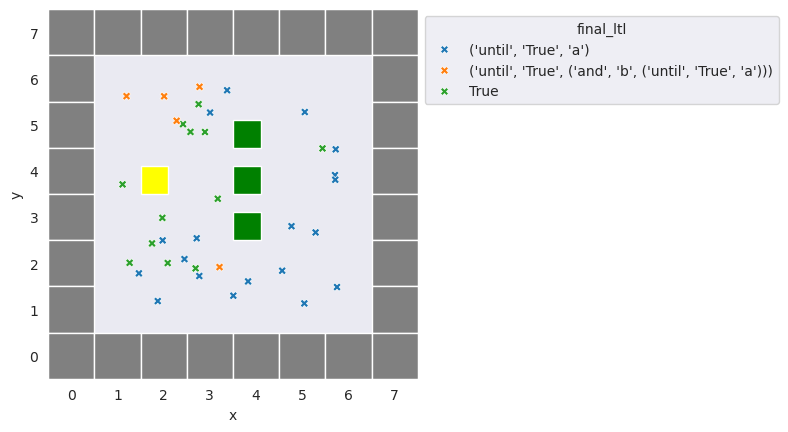

In [27]:
df_success = df[df['success']]
df_half = df[df['final_ltl'] != df['task']]
ax = sns.scatterplot(data=df, x="x", y="y", hue="final_ltl", legend="brief", marker='X')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
for shape in shapes:
    plt.gca().add_patch(shape)
ax.set_xlim([-offset, width-offset])
ax.set_ylim([-offset, height-offset])
ax.set_aspect('equal', adjustable='box')
